# Simple Linear Regression

problem statement :

For a given dataset predict number of bikes getting shared based on temperature of the day
https://drive.google.com/open?id=1ohN2o3zSZ2Xuy4CIdTWN-dTmciUXizst


In [1]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sea
#importing pandas 
import pandas as pd
#importing numpy
import numpy as np
#importing job-lib
import joblib

#importing scikit learn  library classes
import sklearn.model_selection as model_selection
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score


# loading csv data from the file given in the url
data_set = pd.read_csv("bike_sharing.csv")
#prinding info of data
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### data pre - processing 

In [2]:
data_set.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
data_set= pd.DataFrame(data_set[['temp','cnt']])

In [4]:
#looking at top 15 values of data set
data_set.head(15)

,temp,cnt
0,0.24,16
1,0.22,40
2,0.22,32
3,0.24,13
4,0.24,1
5,0.24,1
6,0.22,2
7,0.20,3
8,0.24,8
9,0.32,14


In [5]:
# checking for null values in data set
data_set.isnull().sum()

temp    0
cnt     0
dtype: int64

In [6]:
# checking for null values in data set
data_set.isna().sum()

temp    0
cnt     0
dtype: int64

In [7]:
#checking mean max min and other important data from data set
data_set.describe()

,temp,cnt
count,17379.000000,17379.000000
mean,0.496987,189.463088
std,0.192556,181.387599
min,0.020000,1.000000
25%,0.340000,40.000000
50%,0.500000,142.000000
75%,0.660000,281.000000
max,1.000000,977.000000


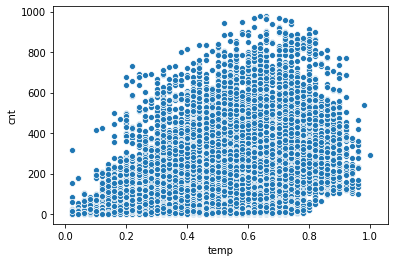

In [8]:
#plotting scatter plot to check for outliers
sea.scatterplot(x = data_set['temp'],y =data_set['cnt'])

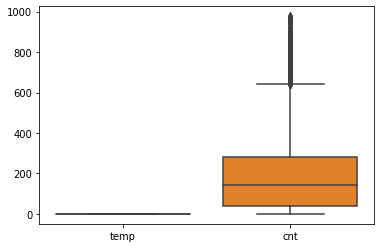

In [9]:
#againg plotting box plot to see the data ranges
sea.boxplot(data = data_set)

##### Splitting data sets 

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_set['temp'], data_set['cnt'], train_size=0.75,test_size=0.25, random_state=42)

In [11]:
#converting each set into numpy arrays
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [12]:
# reshaping just to give these values to fit function
X_train = X_train.reshape(-1,1)
X_test  = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test  = y_test.reshape(-1,1)

#### performing linear regression

In [13]:
#obtaining an object of linear regression class 
regressor = LinearRegression(normalize=False)  
# calling fit method to perform training
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
joblib.dump(regressor,'02_slr_regressor.pkl')

['02_slr_regressor.pkl']

In [15]:
#retrieving the intercept:
print(regressor.intercept_)
#retrieving the slope:
print(regressor.coef_)

[0.98254386]
[[380.60930806]]


#### predicting outputs based on model

In [16]:
#predicting the output of test data set
y_pred = regressor.predict(X_test)

In [17]:
#predicting the output of train data set
y_pred_train = regressor.predict(X_train)

In [18]:
#calculating different types of errors 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 124.16998861892817
Mean Squared Error: 26807.266863982062
Root Mean Squared Error: 163.7292486514919


#### plotting regression line for train and test data set

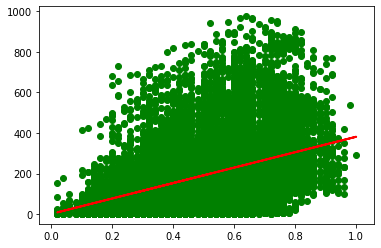

In [19]:
#plotting linear regression line
plt.scatter(X_train, y_train,  color='green')
plt.plot(X_train, y_pred_train, color='red', linewidth=2)
plt.show()

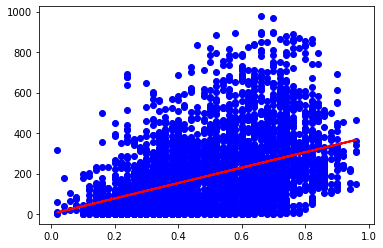

In [20]:
#plotting linear regression line
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

#### determining R^2 score of model

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().

In [21]:
#determining accuracy of test data sets
r_2_score = regressor.score(X_test,y_test)
print(r_2_score*100,'%')

16.63969424067836 %


In [22]:
#determining accuracy of train data set
r_2_score_train = regressor.score(X_train,y_train)
print(r_2_score_train*100,'%')

16.290981214199665 %
